In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/

In [ ]:
# 3
train_image_generator =  ImageDataGenerator(rescale=1./255)
validation_image_generator =  ImageDataGenerator(rescale=1./255)
test_image_generator =  ImageDataGenerator(rescale=1./255)

# flow_from_directory Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required

train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    save_format='jpg',
    interpolation='nearest',
)

val_data_gen = validation_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)
#shuffle=False
test_data_gen = test_image_generator.flow_from_directory(
    'cats_and_dogs/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='sparse',
    classes = ['test'],
    batch_size=batch_size, #1 ou batch_size
    shuffle=False,
    save_format='jpg') #

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


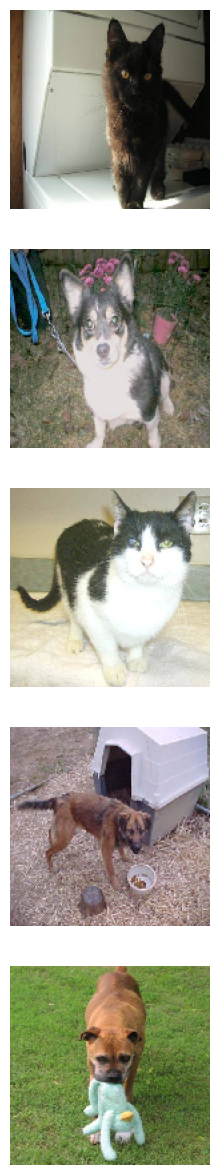

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=30,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          zoom_range=0.30)

Found 2000 images belonging to 2 classes.


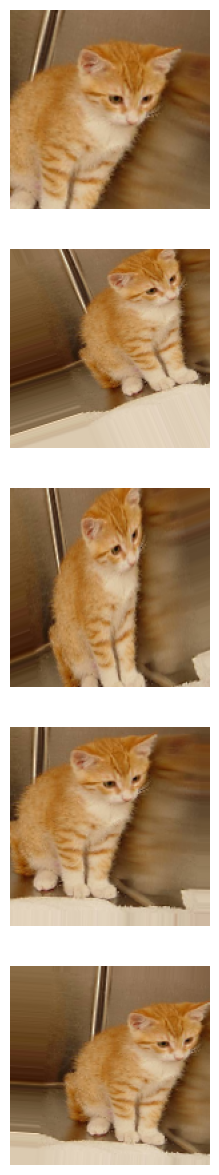

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
#7
model = []
model = Sequential()

model.add( Conv2D(30, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ) )
model.add( MaxPooling2D( (2, 2) ) )

model.add( Conv2D(43, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ) )
model.add( MaxPooling2D( (2, 2) ) )

#model.add( Conv2D(128, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ) )
#model.add( MaxPooling2D( (2, 2) ) )

#model.add( Dropout(0.65) )

model.add( Flatten() )
#model.add( Dense(128, activation='relu') )
model.add( Dense(43, activation='relu') )

model.add( Dense(30, activation='relu') )
model.add( Dense(10, activation='sigmoid') )
model.add( Dense(2, activation='sigmoid')  )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 30)      840       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 43)        11653     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 43)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 55728)             0         
                                                                 
 dense_8 (Dense)             (None, 43)               

In [ ]:
# 8
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #### from_logits=True

history = model.fit(train_data_gen, epochs=epochs, validation_data=val_data_gen)

#history = model.fit(train_data_gen, steps_per_epoch=1, epochs=1, validation_data=val_data_gen, validation_steps=100)

Epoch 1/15
16/16 [==============================] - 25s 1s/step - loss: 0.6922 - accuracy: 0.5110 - val_loss: 0.6751 - val_accuracy: 0.5480
Epoch 2/15
16/16 [==============================] - 16s 981ms/step - loss: 0.6790 - accuracy: 0.5790 - val_loss: 0.6538 - val_accuracy: 0.6490
Epoch 3/15
16/16 [==============================] - 16s 1s/step - loss: 0.6552 - accuracy: 0.6055 - val_loss: 0.6265 - val_accuracy: 0.6530
Epoch 4/15
16/16 [==============================] - 16s 953ms/step - loss: 0.6561 - accuracy: 0.5975 - val_loss: 0.6188 - val_accuracy: 0.6670
Epoch 5/15
16/16 [==============================] - 16s 982ms/step - loss: 0.6598 - accuracy: 0.5930 - val_loss: 0.6256 - val_accuracy: 0.6550
Epoch 6/15
16/16 [==============================] - 16s 1s/step - loss: 0.6448 - accuracy: 0.6190 - val_loss: 0.6291 - val_accuracy: 0.6250
Epoch 7/15
16/16 [==============================] - 17s 1s/step - loss: 0.6247 - accuracy: 0.6495 - val_loss: 0.6014 - val_accuracy: 0.6680
Epoch 8/15


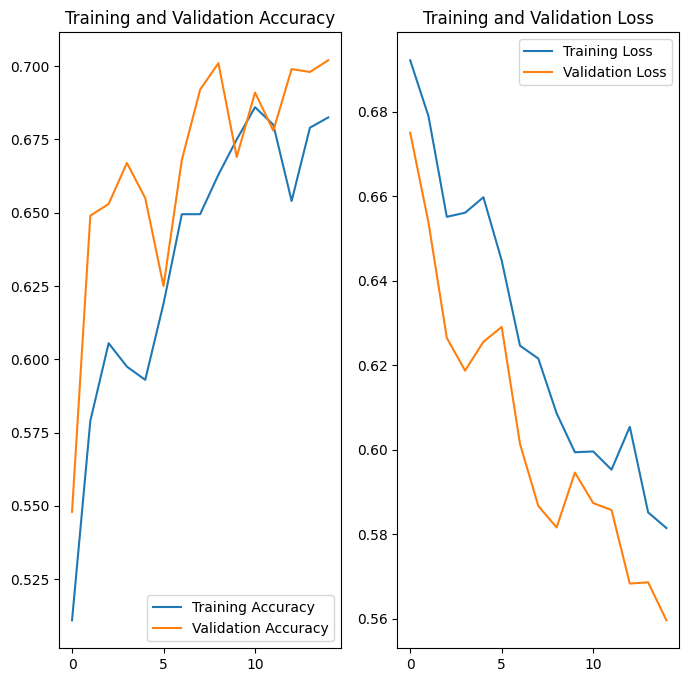

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#probabilities = model.predict(test_data_gen)[0]
probabilities = model.predict(test_data_gen)[:,1]


1/1 [==============================] - 1s 588ms/step


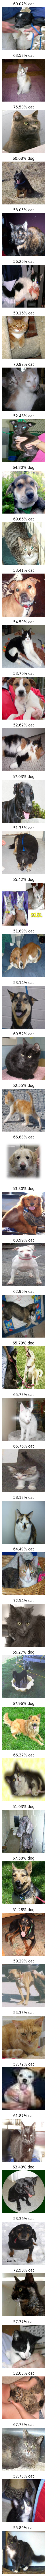

In [ ]:
plotImages(test_data_gen[0][0], probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
